<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Генеративные модели в машинном обучении, МОВС, ФКН ВШЭ</center></h1>
<h2><center>Домашнее задание 3: Диффузия, потоки</center></h2>

# Введение

До заголовка "Диффузионные модели" все по-старому. Только Задания 1-2 теперь неоцениваемые, ведь вы их уже делали

## MAGIC – Major Atmospheric Gamma Imaging Cherenkov Telescope

MAGIC (Major Atmospheric Gamma Imaging Cherenkov) - это система, состоящая из двух черенковских телескопов диаметром 17 м. Они предназначены для наблюдения гамма-лучей от галактических и внегалактических источников в диапазоне очень высоких энергий (от 30 ГэВ до 100 ТэВ).

MAGIC позволил открыть и исследовать новые классы источников гамма-излучения, таких как, например, пульсары и гамма-всплески (GRB).

<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/magic1.jpg?raw=1" width="1000"></center>

Источник: https://magic.mpp.mpg.de/

Youtube video: https://youtu.be/mjcDSR2vSU8

    Ок, давайте зафиксируем. Какой-то крутой телескоп позволяет открыть новые виды излучения. Идем дальше.

## Частицы из космоса

Космические частицы, $\gamma$-кванты (фотоны) и адроны (протоны), взаимодействуют с атмосферой и порождают ливни вторичных частиц. Двигаясь с околосветовой скоростью, эти частицы излучают Черенковское излучение. Телескопы фотографируют это излучение.

    По фотографиям можно определить тип частицы из космоса: фотон или протон. Знакомая формулировка задачи, не правда ли?

<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/shower.jpg?raw=1" width="500"></center>

## Фотографии

Задача атмосферного черенковского телескопа - получить изображение ливня путем измерения черенковского света от частиц ливня. Это изображение представляет собой геометрическую проекцию ливня на детектор. Для анализа этих изображений были введены параметры изображения или так называемые параметры Хилласа. Ниже пример такой фотографии.

<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/geo.jpg?raw=1" width="400"></center>

    Итак, каждая фотография описывается набором параметров, которые за нас считает телесоп. А что там с двумя видами частиц?

## Фотоны vs адронов

Изображения для $\gamma$-квантов (фотонов) и адронов (протонов) отличаются по форме кластеров. Астрономы используют модели машинного обучения для классификации этих изображений. Получение каждого такого изображения - дорогое удовольствие!


<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/gamma_p.png?raw=1" width="600"></center>

Для обучения моделей ученые искусственно генерируют такие изображения для каждого типа частиц с помощью сложных физических симуляторов.

    Итак, давайте сэкономим денег для ученых и сгенерируем хороших фотографий разных частиц. Используем для этого GAN и диффузионные модели!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Данные

Будем использовать данные телескопа MAGIC из UCI репозитория https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. Каждый объект в данных - параметры одного изображения кластера и метка этого кластера (фотон или адрон):


0. Length: major axis of ellipse [mm]
1. Width: minor axis of ellipse [mm]
2. Size: 10-log of sum of content of all pixels [in #phot]
3. Conc: ratio of sum of two highest pixels over fSize [ratio]
4. Conc1: ratio of highest pixel over fSize [ratio]
5. Asym: distance from highest pixel to center, projected onto major axis [mm]
6. M3Long: 3rd root of third moment along major axis [mm]
7. M3Trans: 3rd root of third moment along minor axis [mm]
8. Alpha: angle of major axis with vector to origin [deg]
9. Dist: distance from origin to center of ellipse [mm]
10. class: g,h # gamma (signal), hadron (background)

In [2]:
# read data
names = np.array(
    [
        "Length",
        "Width",
        "Size",
        "Conc",
        "Conc1",
        "Asym",
        "M3Long",
        "M3Trans",
        "Alpha",
        "Dist",
        "class",
    ]
)
data = pd.read_csv("magic04.data", header=None)
data.columns = names
print(data.shape)
data.head()

(19020, 11)


,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Постановка задачи

Ваша задача заключается в том, чтобы с помощью генеративно-состязательных сетей научиться генерировать параметры кластеров на изображениях телескопа для каждого типа частиц (фотона или адрона):

- $X$ - матрица реальных объектов, которые нужно начиться генерировать;
- $y$ - метки классов, которые будем использовать как условие при генерации.

In [3]:
# параметры кластеров на изображениях
X = data[names[:-1]].values
X = np.abs(X)

# метки классов
labels = data[names[-1]].values
y = np.ones((len(labels), 1))
y[labels == "h"] = 0

In [4]:
# примеры
X[:2]

array([[2.87967e+01, 1.60021e+01, 2.64490e+00, 3.91800e-01, 1.98200e-01,
        2.77004e+01, 2.20110e+01, 8.20270e+00, 4.00920e+01, 8.18828e+01],
       [3.16036e+01, 1.17235e+01, 2.51850e+00, 5.30300e-01, 3.77300e-01,
        2.62722e+01, 2.38238e+01, 9.95740e+00, 6.36090e+00, 2.05261e+02]])

In [5]:
# примеры
y[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
# все возможные значения
np.unique(y)

array([0., 1.])

# Визуализация данных

Каждое изображение описывается 10 параметрами. Давайте построим распределения значений каждого параметра для каждого типа частиц.

In [7]:
def plot_hists(X1, X2, names, label1, label2, bins=np.linspace(-3, 3, 61)):
    plt.figure(figsize=(5 * 4, 5 * 2))
    for i in range(X1.shape[1]):
        plt.subplot(3, 4, i + 1)
        plt.grid()
        plt.hist(X1[:, i], bins=bins, alpha=0.3, label=label1, color="C4")
        plt.hist(X2[:, i], bins=bins, alpha=0.3, label=label2, color="C0")
        plt.xlabel(names[i], size=14)
        plt.legend(loc="best")
    plt.tight_layout()

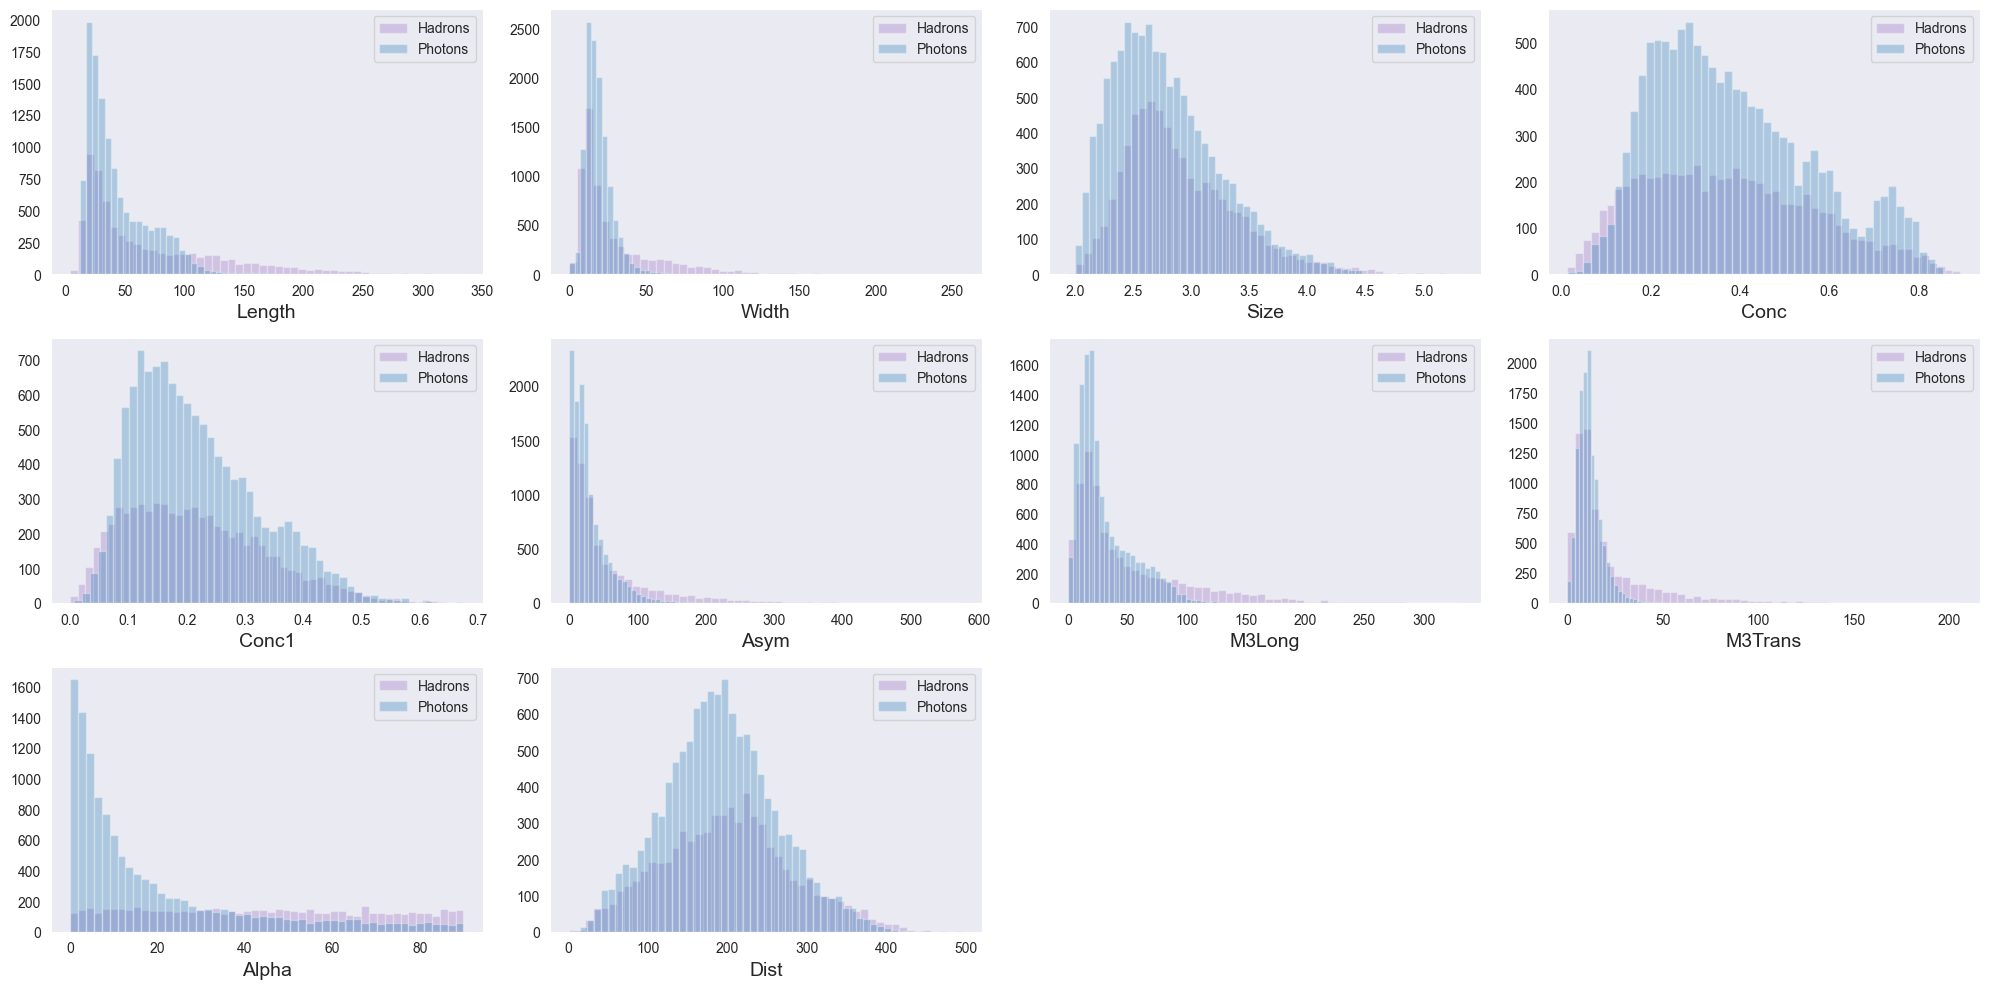

In [8]:
plot_hists(
    X[y[:, 0] == 0], X[y[:, 0] == 1], names, label1="Hadrons", label2="Photons", bins=50
)

# Предобработка данных

Из графика видим, что распределения для многих признаков имеют тяжелые хвосты. Это делает обучение генеративных моделей тяжелее. Поэтому нужно как-то преобразовать данные, чтобы убрать эти тяжелые хвосты.

# Обучающая и тестовая выборки

In [9]:
from sklearn.model_selection import train_test_split

# train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.5, shuffle = True, random_state = 11
)

## Задание 1 (0 баллов)

Проиллюстрируйте распределение y внутри train и test выборки.

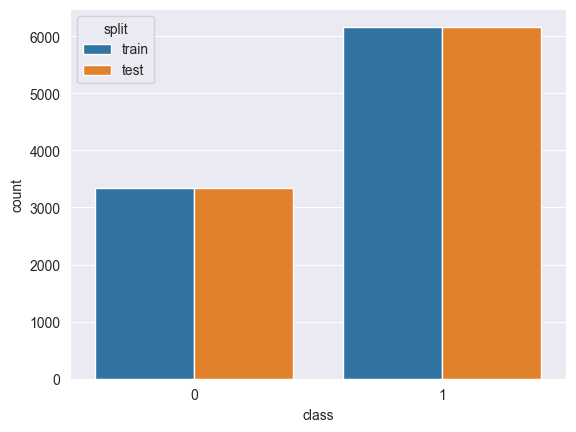

In [10]:
import seaborn as sns
columns = ["class", "split"]
ytrain_df = pd.DataFrame([y_train[:, 0].astype(int), ["train"] * len(y_train)], index=columns).T
ytest_df = pd.DataFrame([y_test[:, 0].astype(int), ["test"] * len(y_test)], index=columns).T
sns.countplot(data=pd.concat([ytrain_df, ytest_df]).reset_index(drop=True), x="class", hue="split");

## Задание 2 (0 баллов)

Используя функцию `sklearn.preprocessing.QuantileTransformer` трансформируйте входные данные `X_train` и `X_test`. Это преобразование делает так, чтобы распределение каждого параметра было нормальным. Описание функции доступно по [ссылке](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html). Используйте значение параметра `output_distribution='normal'`.

In [11]:
RANDOM_STATE = 42

In [12]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=RANDOM_STATE, output_distribution="normal")
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

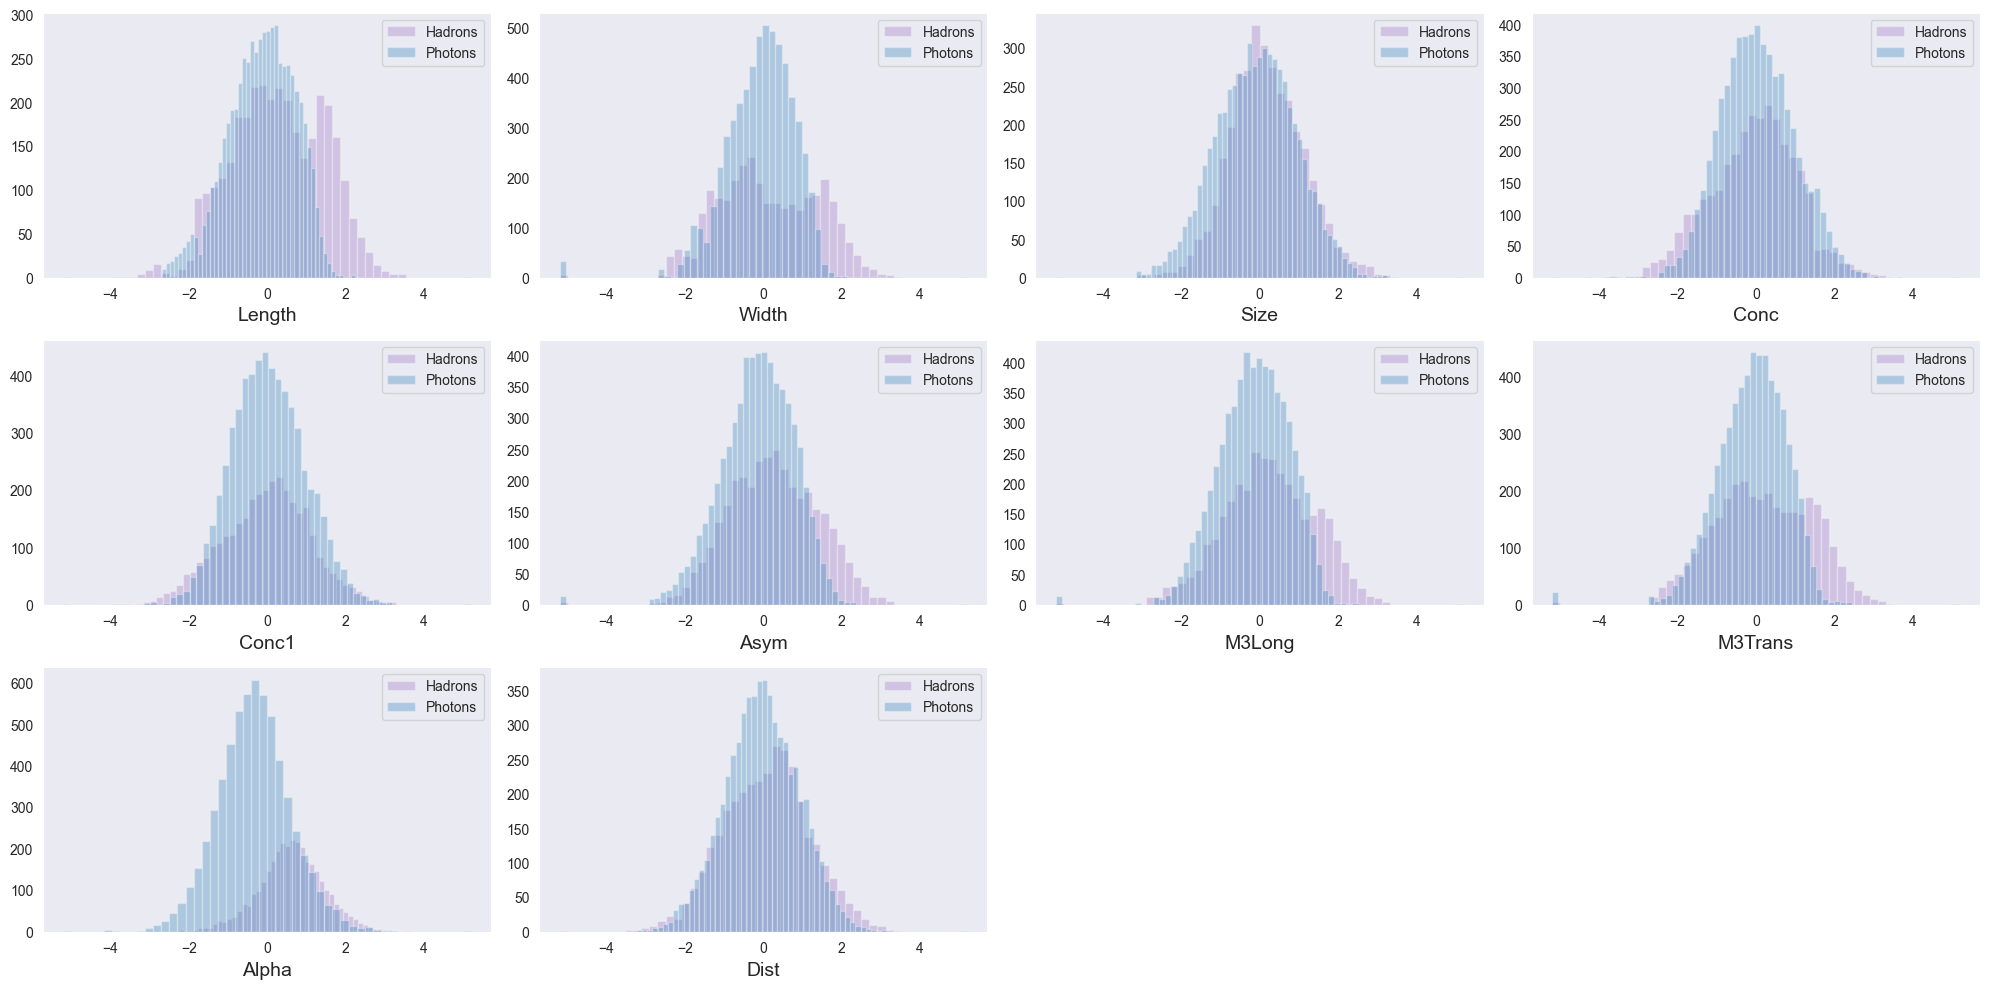

In [13]:
plot_hists(
    X_train[y_train[:, 0] == 0],
    X_train[y_train[:, 0] == 1],
    names,
    label1="Hadrons",
    label2="Photons",
    bins=50,
)

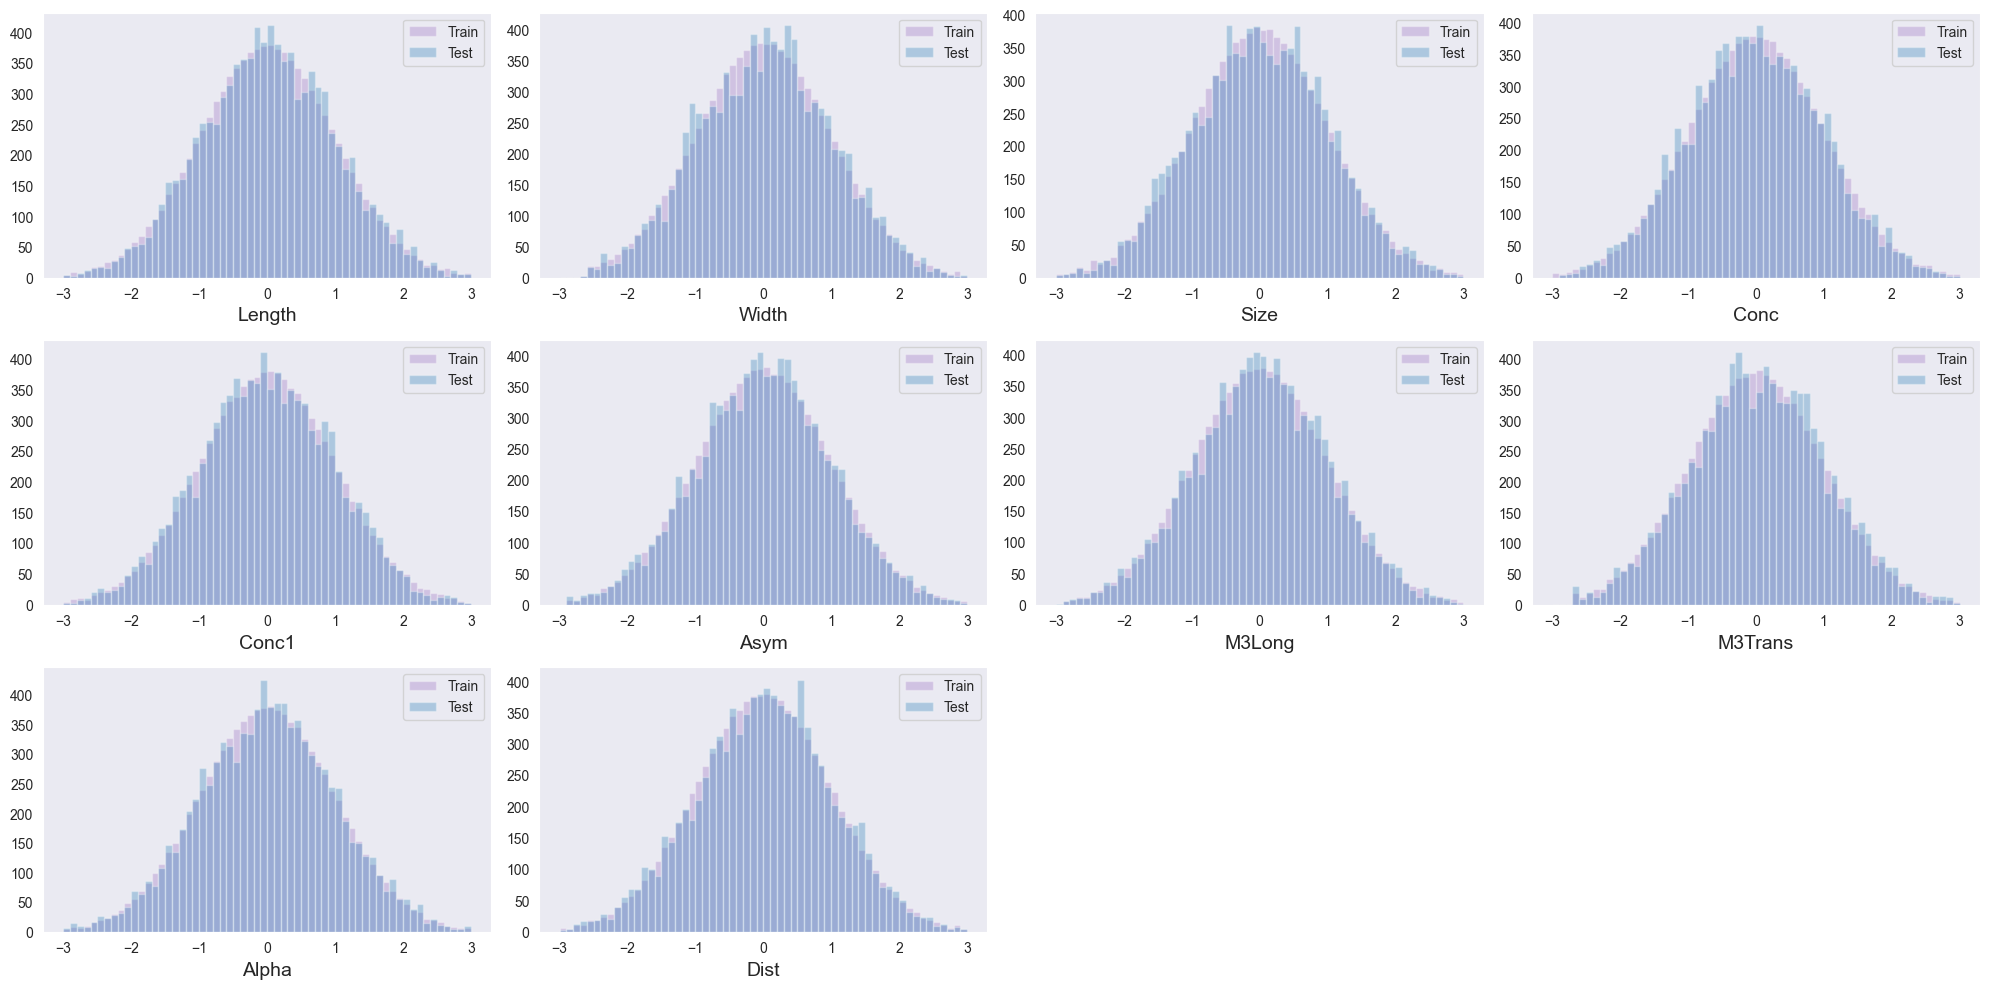

In [14]:
plot_hists(X_train, X_test, names, label1="Train", label2="Test")

# Диффузионные модели (4 балла)

Проведем, по большому счету, такой же эксперимент, как в ДЗ-2, с диффузионной моделью.

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Задание 3 (0.5 балла)

Реализуйте фукнцию из семинара для зашумления данных, адаптировав ее под наш тип данных.

In [16]:
def corrupt(x, amount):
    noise = torch.rand_like(x)
    amount = amount.view(-1, 1)
    return x * (1 - amount) + noise * amount

In [17]:
X_train_tensor = torch.from_numpy(X_train)
X_train_tensor_noise = corrupt(X_train_tensor, torch.linspace(0, 5, X_train.shape[0]))

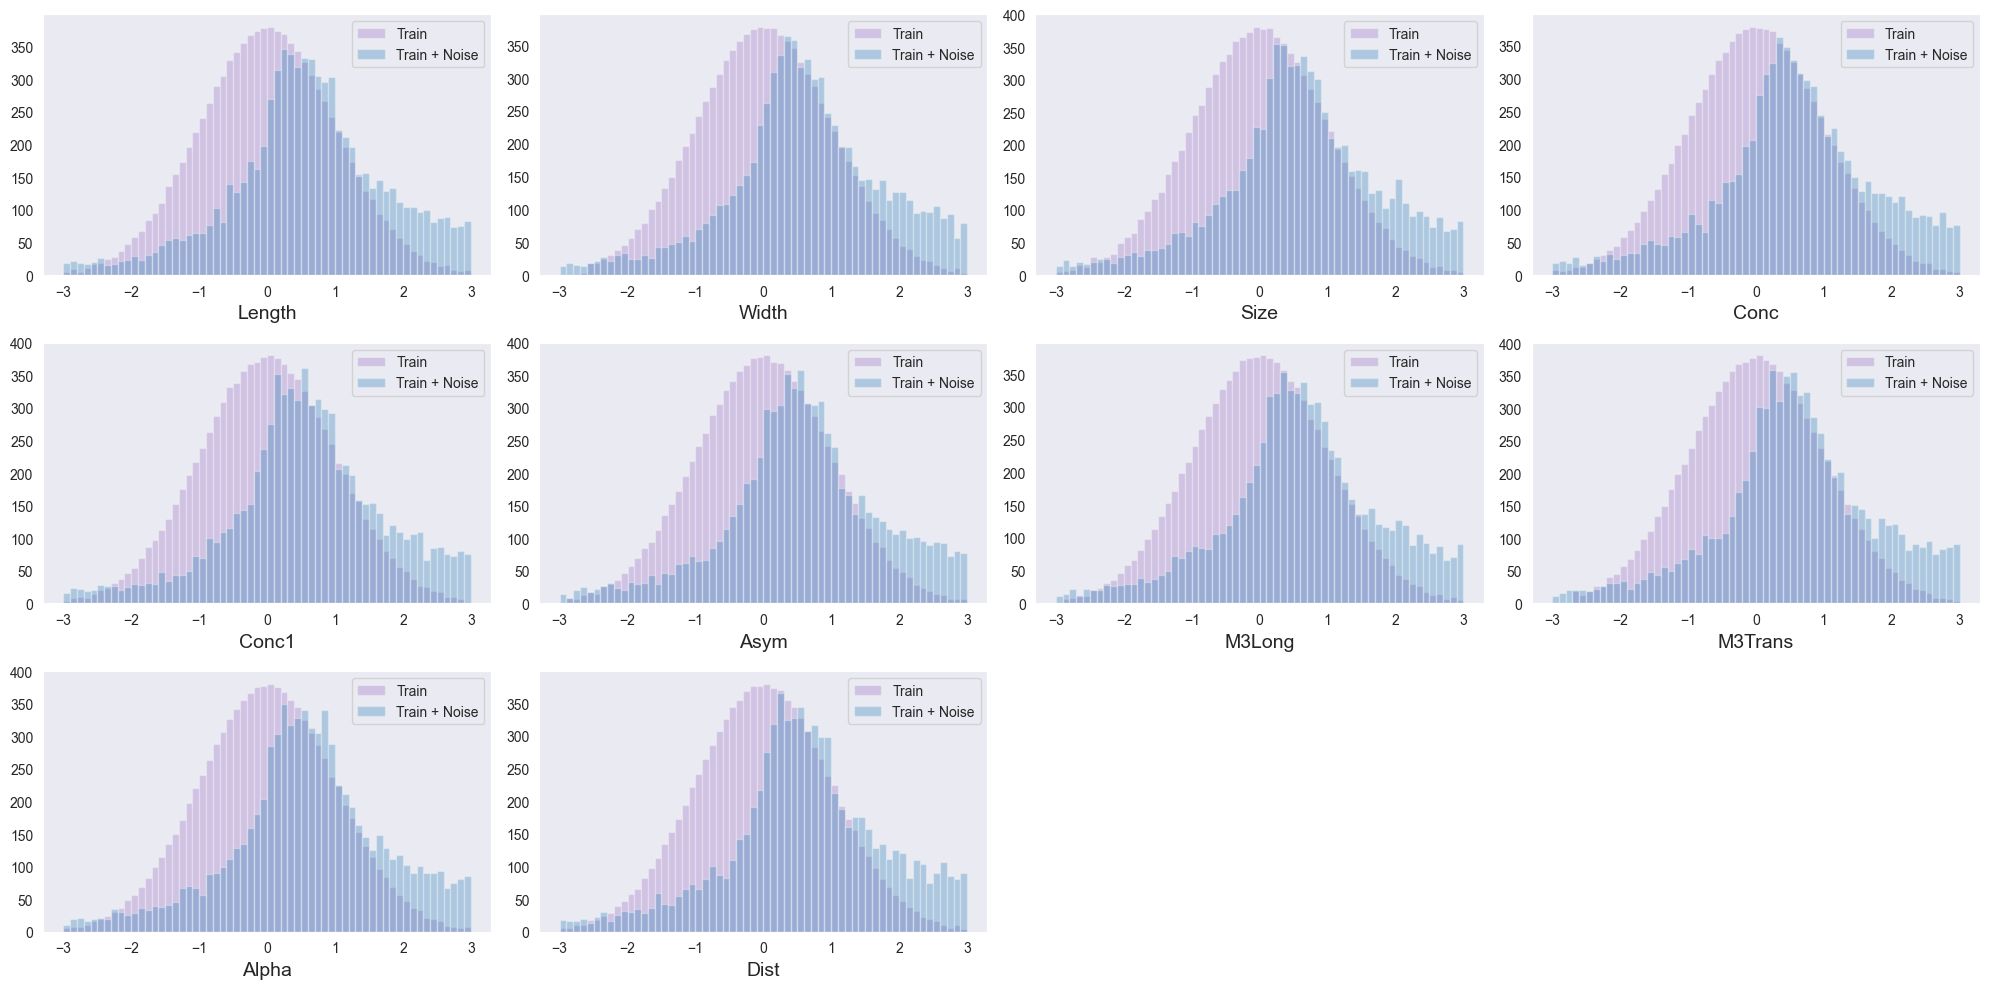

In [18]:
plot_hists(X_train, X_train_tensor_noise.numpy(), names, label1="Train", label2="Train + Noise")

Добавим sсheduler, он пригодится вам при обучении модели.

*Советуем вниматиельно почитать доку по шедулеру.*

In [19]:
!pip install diffusers

In [20]:
from diffusers import DDPMScheduler

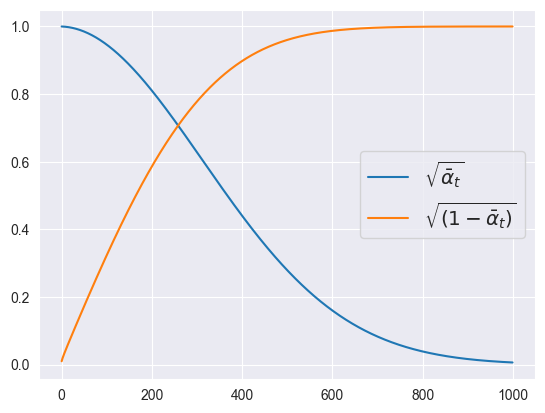

In [21]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
plt.plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large")

## Задание 4 (0.5 балла)

Реализуйте нейронную сеть. В качетсве архитектуры можете взять модель генератора. В процессе экспериментов попробуйте изменять архитектуру модели для улучшения качества сгенерированных объектов (Кстати, как вы будете качество измерять?).

- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

In [22]:
import torch.nn as nn

class DiffusionGenerator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(DiffusionGenerator, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(n_inputs, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, n_outputs)
        )

    def forward(self, z, y):
        zy = torch.cat((z, y), dim=1)
        return self.net(zy)

## Задание 5 (0.5 балла)

Напишите функцию для генерации нового объекта с помощью обученной модели.

In [23]:
def generate_with_diffusion(model, y, latent_dim, sheduler=None):
  with torch.no_grad():
    sample_size = y.size(0)
    y = y.to(DEVICE)
    x = torch.randn((sample_size, latent_dim), device=DEVICE)
    if sheduler is not None:
      for i, t in enumerate(sheduler.timesteps):
          timesteps = t.repeat(sample_size,).to(DEVICE)
          pred = model(x, timesteps, y)
          x = sheduler.step(pred, t, x).prev_sample
    else:
      x = model(x, y)
  return x

## Задание 6 (2 балла)

Напишите класс обучения диффузионной модели и обучите модель, после чего опишите полученные результаты. В качестве подсказки - опирайтесь на семинар по диффузионным моделям. Вы можете изменять некоторые части кода для вашего удобства, но оставляйте в таком случаи комментарии, пожалуйста.

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

def other_agent_score(X_real, X_fake):

    y_real = np.ones(X_real.shape[0])
    y_fake = np.zeros(X_fake.shape[0])

    X = np.vstack((X_real, X_fake))
    y = np.concatenate((y_real, y_fake))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict_proba(X_test)[:, 1]
    lr_accuracy = accuracy_score(y_test, np.round(y_pred_lr))
    lr_roc_auc = roc_auc_score(y_test, y_pred_lr)

    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict_proba(X_test)[:, 1]
    gb_accuracy = accuracy_score(y_test, np.round(y_pred_gb))
    gb_roc_auc = roc_auc_score(y_test, y_pred_gb)

    print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')
    print(f'Gradient Boosting Accuracy: {gb_accuracy:.4f}')
    print("-"*40)
    print(f'Logistic Regression ROC AUC: {lr_roc_auc:.4f}')
    print(f'Gradient Boosting ROC AUC: {gb_roc_auc:.4f}\n\n')

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class DiffusionFitter(object):
    def __init__(
        self,
        model,
        batch_size=32,
        n_epochs=10,
        latent_dim=1,
        lr=0.0001,
        n_critic=5,
        predict_noise=False,
        scheduler=None,
        corruptor=None
    ):
        self.model = model
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic
        self.scheduler = scheduler
        self.corruptor = corruptor
        self.predict_noise = predict_noise

        self.sample_size = 1000

        self.opt_gen = torch.optim.RMSprop(self.model.parameters(), lr=self.lr)
        self.model.to(DEVICE)

    def fit(self, X, y):
        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)

        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)

        # Turn on training
        self.model.train(True)

        self.loss_history = []

        # Fit
        for epoch in range(self.n_epochs):
            loss_epoch = 0
            for i, (real_batch, cond_batch) in enumerate(
                DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
            ):
                if self.scheduler is not None:
                  timesteps = torch.randint(0, max(noise_scheduler.timesteps), (real_batch.size(0),), device=DEVICE).long()
                  noise = torch.randn_like(real_batch, device=DEVICE)
                  noisy_x = noise_scheduler.add_noise(real_batch, noise, timesteps)
                  X_fake = self.model(noisy_x, timesteps, cond_batch)

                if self.corruptor is not None:
                  noise_amount = torch.linspace(0, 1, real_batch.size(0), device=DEVICE)
                  noisy_x = self.corruptor(real_batch, noise_amount)
                  X_fake = self.model(noisy_x, cond_batch)

                loss = F.mse_loss(X_fake, real_batch)

                self.opt_gen.zero_grad()
                loss.backward()
                self.opt_gen.step()

                loss_epoch += loss.item()

            self.loss_history.append(loss_epoch)

            if epoch % 10 == 0 or epoch == self.n_epochs - 1:
                print(f'Epoch [{epoch + 1}/{self.n_epochs}], Loss: {loss_epoch:.4f}')

                X_fake = generate_with_diffusion(self.model,
                                                 y_cond[:self.sample_size],
                                                 self.latent_dim,
                                                 self.scheduler)
                other_agent_score(X_real.cpu().numpy(), X_fake.cpu().numpy())

        self.model.train(False)

In [26]:
%%time
latent_dim = 10
model = DiffusionGenerator(n_inputs=latent_dim + y.shape[1], n_outputs=X_train.shape[1])

diffusionFitter = DiffusionFitter(
    model,
    batch_size=50,
    n_epochs=100,
    latent_dim=latent_dim,
    lr=0.0001,
    n_critic=5,
    corruptor=corrupt,
    predict_noise=False
)
diffusionFitter.fit(X_train, y_train)

Epoch [1/100], Loss: 94.6629
Logistic Regression Accuracy: 0.9049
Gradient Boosting Accuracy: 0.9155
----------------------------------------
Logistic Regression ROC AUC: 0.5650
Gradient Boosting ROC AUC: 0.8906


Epoch [11/100], Loss: 53.9206
Logistic Regression Accuracy: 0.9049
Gradient Boosting Accuracy: 0.9068
----------------------------------------
Logistic Regression ROC AUC: 0.4566
Gradient Boosting ROC AUC: 0.7607


Epoch [21/100], Loss: 52.7251
Logistic Regression Accuracy: 0.9049
Gradient Boosting Accuracy: 0.9049
----------------------------------------
Logistic Regression ROC AUC: 0.4696
Gradient Boosting ROC AUC: 0.7538


Epoch [31/100], Loss: 51.1886
Logistic Regression Accuracy: 0.9049
Gradient Boosting Accuracy: 0.9068
----------------------------------------
Logistic Regression ROC AUC: 0.4868
Gradient Boosting ROC AUC: 0.7482


Epoch [41/100], Loss: 50.7971
Logistic Regression Accuracy: 0.9049
Gradient Boosting Accuracy: 0.9053
---------------------------------------

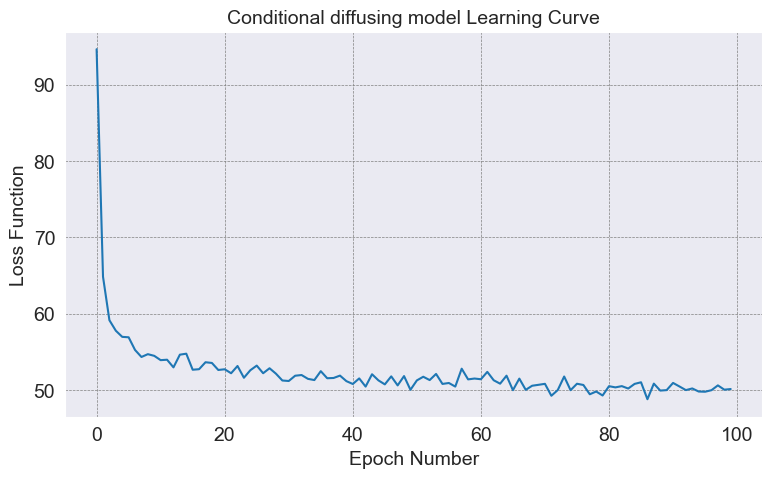

In [27]:
# diffusion learning curve
plt.figure(figsize=(9, 5))
plt.plot(diffusionFitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional diffusing model Learning Curve", size=14)
plt.grid(linestyle="--", linewidth=0.5, color="0.5")
plt.show()

## Задание 7 (0.5 балла)
По аналогии с прошлым экспериментом (из ДЗ-2) с GAN моделью сгенерируйте выборку фейковых объектов, равную размеру тестовой выборки, и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с сWGAN моделью?

In [28]:
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [29]:
X_fake_test = generate_with_diffusion(model, y_test_tensor, latent_dim)

In [30]:
other_agent_score(X_test, X_fake_test.cpu().numpy())

Logistic Regression Accuracy: 0.5558
Gradient Boosting Accuracy: 0.8326
----------------------------------------
Logistic Regression ROC AUC: 0.6043
Gradient Boosting ROC AUC: 0.9126




- По ROC AUC видно, что градиентный бустинг хорошо отличает реальные объекты от фейковых ROC AUC около 0.9, при этом на выборке из 1000 объектов из X_train и 1000 сгенерированных объектов ROC AUC достаточно меньше - около 0.75.   
- Если сравнивать этот результат с предыдущим экспериментом на cWGAN, где ROC AUC также был около 0.75, то можно сказать, что генерация в обоих подходах ещё не достигает уровня, где фейковые объекты полностью "неотличимы" от реальных (необходим ROC AUC 0.5).

# Потоки (4 балла)

## Задание 8 (1.5 балла)

Диффузия показала себя как достойный конкурент GAN модели. Так как данных не много, обучали не долго, задача не сложная - отличия от GAN не так заметны, но все равно достойные.

Для Diffusion получили ROC AUC около 0.73 (меньше лучше). Попробуем обучить RealNVP для решения этой задачи.

**Дополните базовый класс для нормализационного необходимым.**

<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/mem1.jpg?raw=1" width="500"></center>

<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/mem2.jpg?raw=1" width="500"></center>

In [53]:
trainloader = torch.utils.data.DataLoader(X_train, batch_size=64, shuffle=True)

In [54]:
class NormalizingFlow(nn.Module):
    def __init__(self, layers, prior):
        super().__init__()
        self.layers = nn.ModuleList(layers)
        self.prior = prior

    def log_prob(self, x):
        log_likelihood = None

        for layer in self.layers:
            x, change = layer.f(x)
            if log_likelihood is not None:
                log_likelihood = log_likelihood + change
            else:
                log_likelihood = change
        log_likelihood = log_likelihood + self.prior.log_prob(x)

        return log_likelihood.mean()

    def sample(self, num_samples):
        x = self.prior.sample((num_samples,))

        for layer in self.layers[::-1]:
            x = layer.g(x)

        return x

## Задание 9 (2 балла)

Реализуйте нейронную сеть RealNVP. Возьмите для прямого и обратного преобразования нейронную сеть (функцию) со следующими параметрами:

- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Выходной слой.

In [55]:
import torch.nn as nn

class RealNVP(nn.Module):
    def __init__(self, var_size, mask, hidden=100):
        super(RealNVP, self).__init__()
        self.mask = mask
        self.var_size = var_size

        self.nn_t = nn.Sequential(
            nn.Linear(var_size, hidden),
            nn.ReLU(),
            nn.Linear(hidden, var_size),
        )
        self.nn_s = nn.Sequential(
            nn.Linear(var_size, hidden),
            nn.ReLU(),
            nn.Linear(hidden, var_size),
        )


    def f(self, x):
        t = self.nn_t(x * self.mask[None, :])
        s = torch.tanh(
            self.nn_s(x * self.mask[None, :])
        )

        new_x = (x * torch.exp(s) + t) * (1 - self.mask[None, :]) + x * self.mask[None, :]
        log_det = (s * (1 - self.mask[None, :])).sum(dim=-1)
        return new_x, log_det

    def g(self, x):
        t = self.nn_t(x * self.mask[None, :])
        s = torch.tanh(self.nn_s(x * self.mask[None, :]))

        new_x = ((x - t) * torch.exp(-s)) * (1 - self.mask[None, :]) + x * self.mask[None, :]
        return new_x

In [56]:
def train_nf(tr_dataloader, nf, opt, num_epochs):
    nf.train()
    loss_trace = []

    iter_i = 0

    for epoch_i in range(num_epochs):
        for batch in tr_dataloader:
            x = batch.float()

            opt.zero_grad()

            loss = -nf.log_prob(x).mean()
            loss.backward()

            opt.step()

            loss_trace.append((iter_i, loss.item()))

            iter_i += 1

        if epoch_i % 10 == 0 or epoch_i == num_epochs - 1:
            print(f'Epoch [{epoch_i + 1}/{num_epochs}], Loss: {loss.item():.4f}')
            
            X_fake = generate_with_normalizing_flow(nf, X_test.shape[0])         
            other_agent_score(X_test, X_fake)

In [57]:
prior = torch.distributions.MultivariateNormal(torch.zeros(10), torch.eye(10))

layers = []
for i in range(4):
    layers.append(RealNVP(var_size=10, mask=((torch.arange(10) + i) % 2)))

nf = NormalizingFlow(layers=layers,
                    prior=prior)

opt = torch.optim.Adam(nf.parameters())

In [58]:
train_nf(trainloader, nf, opt, num_epochs=100)

Epoch [1/100], Loss: 8.7936
Logistic Regression Accuracy: 0.5544
Gradient Boosting Accuracy: 0.7062
----------------------------------------
Logistic Regression ROC AUC: 0.5537
Gradient Boosting ROC AUC: 0.7806


Epoch [11/100], Loss: 6.8946
Logistic Regression Accuracy: 0.5365
Gradient Boosting Accuracy: 0.6135
----------------------------------------
Logistic Regression ROC AUC: 0.5562
Gradient Boosting ROC AUC: 0.6608


Epoch [21/100], Loss: 7.3924
Logistic Regression Accuracy: 0.5359
Gradient Boosting Accuracy: 0.5964
----------------------------------------
Logistic Regression ROC AUC: 0.5432
Gradient Boosting ROC AUC: 0.6396


Epoch [31/100], Loss: 7.2590
Logistic Regression Accuracy: 0.5232
Gradient Boosting Accuracy: 0.5844
----------------------------------------
Logistic Regression ROC AUC: 0.5402
Gradient Boosting ROC AUC: 0.6200


Epoch [41/100], Loss: 7.4994
Logistic Regression Accuracy: 0.5319
Gradient Boosting Accuracy: 0.5746
----------------------------------------
Log

## Задание 10 (0.5 балла)

По аналогии с прошлым экспериментом с диффузией сгенерируйте выборку фейковых объектов, равную размеру тестовой выборки, и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с остальными моделями?

In [59]:
def generate_with_normalizing_flow(norm_flow, num_samples):
  norm_flow.eval()
  with torch.no_grad():
    X_fake = norm_flow.sample(num_samples)
  return X_fake

In [60]:
X_fake = generate_with_normalizing_flow(nf, X_test.shape[0])

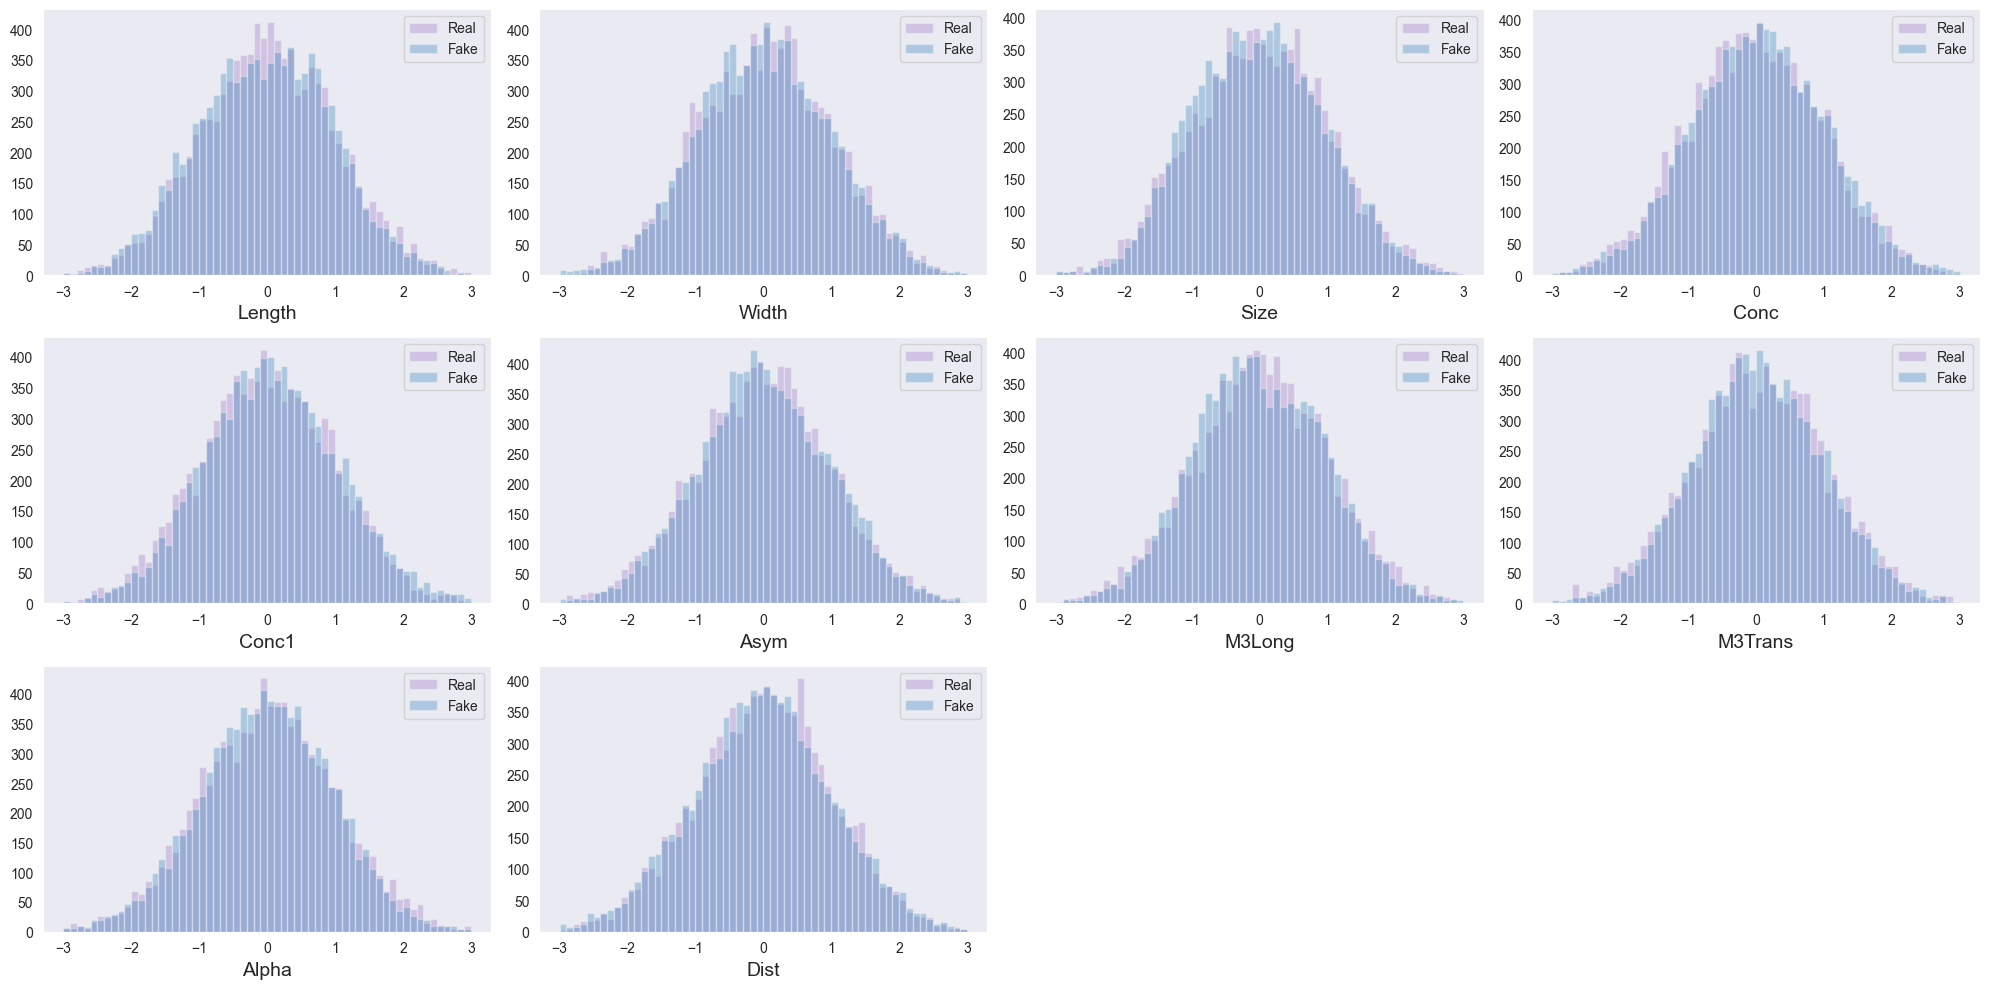

In [61]:
plot_hists(X_test, X_fake.numpy(), names, label1="Real", label2="Fake")

In [62]:
other_agent_score(X_test, X_fake)

Logistic Regression Accuracy: 0.5434
Gradient Boosting Accuracy: 0.5859
----------------------------------------
Logistic Regression ROC AUC: 0.5619
Gradient Boosting ROC AUC: 0.6301




Норм. потоки показали лучший ROC AUC 0.63 (бустинга куда тяжелее различать реальные и фейковые объекты), что меньше чем у диффузии и cWGAN.

# Улучшения (1+ балл)

Попробуйте настроить параметры обучения какой-нибудь модели или еще как-нибудь их улучшить, чтобы получить как можно меньший ROC AUC. Что получилось? Какая модель лучше?

Ставим 0.1 балл за каждую сотую скора сверх (сниз) ROC-AUC=0.65 невключительно. Т.е. за 0.65 получаете 0, за 0.649 -- 0.1, 0.639 -- 0.2, 0.609 -- 0.5, 0.559 -- 1

- Добавляем еще один скрытый слой в архитектуре;
- Добавляем lr=1e-3 и weight_decay=1e-5 в оптимайзере;
- Увеличиваем размер скрытого слоя до 200.

Получаем ROC AUC около 0.6

In [97]:
trainloader = torch.utils.data.DataLoader(X_train, batch_size=64, shuffle=True)

In [98]:
class NormalizingFlow(nn.Module):
    def __init__(self, layers, prior):
        super().__init__()
        self.layers = nn.ModuleList(layers)
        self.prior = prior

    def log_prob(self, x):
        log_likelihood = None

        for layer in self.layers:
            x, change = layer.f(x)
            if log_likelihood is not None:
                log_likelihood = log_likelihood + change
            else:
                log_likelihood = change
        log_likelihood = log_likelihood + self.prior.log_prob(x)

        return log_likelihood.mean()

    def sample(self, num_samples):
        x = self.prior.sample((num_samples,))

        for layer in self.layers[::-1]:
            x = layer.g(x)

        return x

In [99]:
import torch.nn as nn

class RealNVP(nn.Module):
    def __init__(self, var_size, mask, hidden=200):
        super(RealNVP, self).__init__()
        self.mask = mask
        self.var_size = var_size

        self.nn_t = nn.Sequential(
            nn.Linear(var_size, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, var_size),
        )
        self.nn_s = nn.Sequential(
            nn.Linear(var_size, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, var_size),
        )

    def f(self, x):
        t = self.nn_t(x * self.mask[None, :])
        s = torch.tanh(
            self.nn_s(x * self.mask[None, :])
        )

        new_x = (x * torch.exp(s) + t) * (1 - self.mask[None, :]) + x * self.mask[None, :]
        log_det = (s * (1 - self.mask[None, :])).sum(dim=-1)
        return new_x, log_det

    def g(self, x):
        t = self.nn_t(x * self.mask[None, :])
        s = torch.tanh(self.nn_s(x * self.mask[None, :]))

        new_x = ((x - t) * torch.exp(-s)) * (1 - self.mask[None, :]) + x * self.mask[None, :]
        return new_x

In [100]:
def train_nf(tr_dataloader, nf, opt, num_epochs):
    nf.train()
    loss_trace = []

    iter_i = 0

    for epoch_i in range(num_epochs):
        for batch in tr_dataloader:
            x = batch.float()

            opt.zero_grad()

            loss = -nf.log_prob(x).mean()
            loss.backward()

            opt.step()

            loss_trace.append((iter_i, loss.item()))

            iter_i += 1

        if epoch_i % 10 == 0 or epoch_i == num_epochs - 1:
            print(f'Epoch [{epoch_i + 1}/{num_epochs}], Loss: {loss.item():.4f}')
            
            X_fake = generate_with_normalizing_flow(nf, X_test.shape[0])         
            other_agent_score(X_test, X_fake)

In [101]:
prior = torch.distributions.MultivariateNormal(torch.zeros(10), torch.eye(10))

layers = []
for i in range(4):
    layers.append(RealNVP(var_size=10, mask=((torch.arange(10) + i) % 2)))

nf = NormalizingFlow(layers=layers,
                    prior=prior)

opt = torch.optim.Adam(nf.parameters(), lr=1e-3, weight_decay=1e-5)

In [102]:
train_nf(trainloader, nf, opt, num_epochs=100)

Epoch [1/100], Loss: 7.4079
Logistic Regression Accuracy: 0.5813
Gradient Boosting Accuracy: 0.6654
----------------------------------------
Logistic Regression ROC AUC: 0.6154
Gradient Boosting ROC AUC: 0.7273


Epoch [11/100], Loss: 7.3809
Logistic Regression Accuracy: 0.5588
Gradient Boosting Accuracy: 0.6013
----------------------------------------
Logistic Regression ROC AUC: 0.5829
Gradient Boosting ROC AUC: 0.6502


Epoch [21/100], Loss: 7.5391
Logistic Regression Accuracy: 0.5420
Gradient Boosting Accuracy: 0.5979
----------------------------------------
Logistic Regression ROC AUC: 0.5674
Gradient Boosting ROC AUC: 0.6404


Epoch [31/100], Loss: 5.5543
Logistic Regression Accuracy: 0.5285
Gradient Boosting Accuracy: 0.5863
----------------------------------------
Logistic Regression ROC AUC: 0.5400
Gradient Boosting ROC AUC: 0.6286


Epoch [41/100], Loss: 5.9592
Logistic Regression Accuracy: 0.5394
Gradient Boosting Accuracy: 0.5958
----------------------------------------
Log

In [119]:
X_fake = generate_with_normalizing_flow(nf, X_test.shape[0])

In [120]:
other_agent_score(X_test, X_fake)

Logistic Regression Accuracy: 0.5285
Gradient Boosting Accuracy: 0.5746
----------------------------------------
Logistic Regression ROC AUC: 0.5480
Gradient Boosting ROC AUC: 0.6046




# (*) Аналитика (1 балл)

***Убедительно* подвтердите или опровергните гипотезу "Синтетические данные НЕ помогают лучше классифицировать частицы из исходного датасета."**

Здесь от вас ожидается что-то в духе аналитической записки. Приветствуются графики и прочие "умные вещи". На максимальный балл это весьма объемное задание.